In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = data.drop("Id",axis=1)

In [5]:
data.shape

(150, 5)

In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
map_dict = {"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2}

In [8]:
data['Species'] = data['Species'].map(map_dict)

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
#checking for outlier values
import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Christy\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


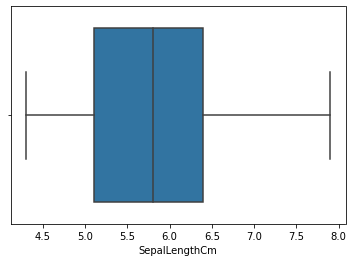

In [12]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['SepalLengthCm'],orient='h')

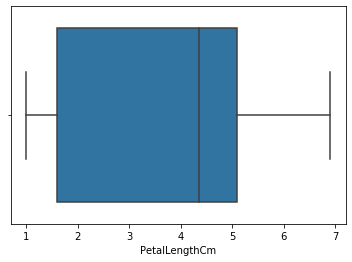

In [13]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['PetalLengthCm'],orient='h')

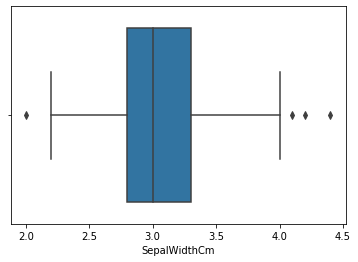

In [14]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['SepalWidthCm'],orient='h')

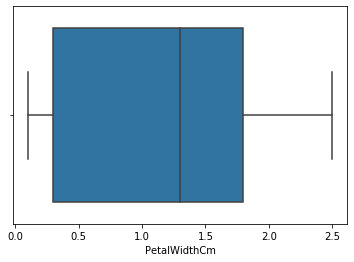

In [15]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['PetalWidthCm'],orient='h')

In [16]:
# Sepal Width has outlier values

In [17]:
descr = data["SepalWidthCm"].describe()
IQR = descr['75%'] - descr['25%']
upper_limit =  descr['75%'] + 1.5 * IQR
lower_limit =  descr['25%'] - 1.5 * IQR  
#outlier replacement
data["SepalWidthCm"][data["SepalWidthCm"]>upper_limit] = upper_limit
data["SepalWidthCm"][data["SepalWidthCm"]<lower_limit] = lower_limit

C:\Users\Christy\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Christy\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


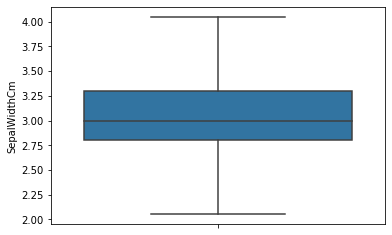

In [18]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['SepalWidthCm'],orient='v')

In [19]:
y = data['Species']
X = data.drop('Species',axis=1)

In [20]:
from sklearn.model_selection import train_test_split #this funciton split x and y randomnly-
#so for each time the output will be diffrent.to keep the data consistant we have to set a seed.random_state!=0, we are setting a seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50) #0.67 data will be for training.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier=LogisticRegression() #creating a Logistic Regression object
classifier.fit(X_train,y_train) #command for training / fitting the model

C:\Users\Christy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
ypred = classifier.predict(X_test)

In [24]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.98

In [25]:
classifier.score(X_test,y_test)  #Accurcy score for testing

0.98

In [26]:
classifier.score(X_train,y_train)  #Accurcy score for training

0.97

### Confussion Matrix


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

### Assume we are predicting breast tumor is benign or malignant

#### true positives (TP): These are cases in which we predicted yes (they have the malignant), and they do have the malignant.
#### true negatives (TN): We predicted no, and they don't have the malignant.
#### false positives (FP): We predicted yes, but they don't actually have the malignant. (Also known as a "Type I error.")
#### false negatives (FN): We predicted no, but they actually do have the malignant. (Also known as a "Type II error.")

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,ypred)  #diagonal values are the correct predictions,TRUE predictions

array([[17,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 16]], dtype=int64)

In [29]:
accuracy = (17+16+16) /(17+16+16+1)
accuracy

0.98

In [30]:
#END